# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);


* `balcony` — число балконов;


* `ceiling_height` — высота потолков (м);


* `cityCenters_nearest` — расстояние до центра города (м);


* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);


* `first_day_exposition` — дата публикации;


* `floor` — этаж;


* `floors_total` — всего этажей в доме;


* `is_apartment` — апартаменты (булев тип);


* `kitchen_area` — площадь кухни в квадратных метрах (м²);


* `last_price` — цена на момент снятия с публикации;


* `living_area` — жилая площадь в квадратных метрах (м²);


* `locality_name` — название населённого пункта;


* `open_plan` — свободная планировка (булев тип);


* `parks_around3000` — число парков в радиусе 3 км;


* `parks_nearest` — расстояние до ближайшего парка (м);


* `ponds_around3000` — число водоёмов в радиусе 3 км;


* `ponds_nearest` — расстояние до ближайшего водоёма (м);


* `rooms` — число комнат;


* `studio` — квартира-студия (булев тип);


* `total_area` — площадь квартиры в квадратных метрах (м²);


* `total_images` — число фотографий квартиры в объявлении.

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

# Задачи исследования

1. Изучить параметры квартир: площадь, цена, число комнат, высота потолков и построить гистограммы для каждого параметра.  


2. Изучить время продажи квартир, построить гистограмму и посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Ответить на вопрос: когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


3. Исключить квартиры с редкими и выбивающиемися значения. Описать, какие особенности были обнаружены.


4. Изучить зависимость цены от площади, числа комнат, удалённости от центра, от этажа расположения квартиры: первом, последнем или другом, и от даты размещения: дня недели, месяца и года. Ответить на вопрос: какие факторы больше всего влияют на стоимость квартиры?


5. Выбрать 10 населённых пунктов с наибольшим числом объявлений, посчитать среднюю цену квадратного метра в этих населённых пунктах и выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.


6. Изучить предложения квартир (расстояние до центра) и выделить квартиры в Санкт-Петербурге (`locality_name`). Выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах (округлить до целых значений) и посчитать среднюю цену для каждого километра. Построить график зависимости цены от удаленности от центра и определить границу, где график сильно меняется (центральная зона).


7. Выделить сегмент квартир в центре, проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайть выводы и ответить на вопрос: отличаются ли они от общих выводов по всему городу?

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Импорт-используемых-библиотек" data-toc-modified-id="Импорт-используемых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт используемых библиотек</a></span></li><li><span><a href="#Чтение-файла-с-архивом-объявлений-о-продаже-квартир-в-СПб-и-ЛО-за-несколько-лет" data-toc-modified-id="Чтение-файла-с-архивом-объявлений-о-продаже-квартир-в-СПб-и-ЛО-за-несколько-лет-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла с архивом объявлений о продаже квартир в СПб и ЛО за несколько лет</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Изменение-последовательности-столбцов" data-toc-modified-id="Изменение-последовательности-столбцов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение последовательности столбцов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчёт-цены-квадратного-метра" data-toc-modified-id="Расчёт-цены-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёт цены квадратного метра</a></span></li><li><span><a href="#Добавление-дня-недели,-месяца-и-года-публикации-объявления" data-toc-modified-id="Добавление-дня-недели,-месяца-и-года-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление дня недели, месяца и года публикации объявления</a></span></li><li><span><a href="#Категоризация-этажей" data-toc-modified-id="Категоризация-этажей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Категоризация этажей</a></span></li><li><span><a href="#Расчёт-соотношений-площадей" data-toc-modified-id="Расчёт-соотношений-площадей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчёт соотношений площадей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-квартиры" data-toc-modified-id="Изучение-параметров-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров квартиры</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры,-расчёт-среднего-и-медианы" data-toc-modified-id="Изучение-времени-продажи-квартиры,-расчёт-среднего-и-медианы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры, расчёт среднего и медианы</a></span></li><li><span><a href="#Исключение-квартир-с-редкими-и-выбивающиемися-значениями" data-toc-modified-id="Исключение-квартир-с-редкими-и-выбивающиемися-значениями-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исключение квартир с редкими и выбивающиемися значениями</a></span></li><li><span><a href="#Изучение-зависимости-цены-от-площади,-числа-комнат,-этажа-(первого-или-последнего),-удалённости-от-центра-и-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="Изучение-зависимости-цены-от-площади,-числа-комнат,-этажа-(первого-или-последнего),-удалённости-от-центра-и-даты-размещения:-дня-недели,-месяца-и-года-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение зависимости цены от площади, числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года</a></span></li><li><span><a href="#Выбор-10-населённых-пунктов-с-наибольшим-числом-объявлений,-расчет-средней-цены-квадратного-метра-в-этих-населённых-пунктах-и-обнаружение-среди-них-населённых-пунктов-с-самой-высокой-и-низкой-стоимостью-жилья" data-toc-modified-id="Выбор-10-населённых-пунктов-с-наибольшим-числом-объявлений,-расчет-средней-цены-квадратного-метра-в-этих-населённых-пунктах-и-обнаружение-среди-них-населённых-пунктов-с-самой-высокой-и-низкой-стоимостью-жилья-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выбор 10 населённых пунктов с наибольшим числом объявлений, расчет средней цены квадратного метра в этих населённых пунктах и обнаружение среди них населённых пунктов с самой высокой и низкой стоимостью жилья</a></span></li><li><span><a href="#Изучение-предложений-квартир-(расстояние-до-центра)-и-определение-квартир-в-Санкт-Петербурге.-Определение-области-входящей-в-центр" data-toc-modified-id="Изучение-предложений-квартир-(расстояние-до-центра)-и-определение-квартир-в-Санкт-Петербурге.-Определение-области-входящей-в-центр-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение предложений квартир (расстояние до центра) и определение квартир в Санкт-Петербурге. Определение области входящей в центр</a></span></li><li><span><a href="#Выделение-сегмента-квартир-в-центре-и-изучение-следующих-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Выделение-факторов,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления)" data-toc-modified-id="Выделение-сегмента-квартир-в-центре-и-изучение-следующих-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Выделение-факторов,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления)-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделение сегмента квартир в центре и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

### Импорт используемых библиотек

In [1]:
# импорт библиотеки pandas
import pandas as pd

# Импорт библиотеки matpotlib
import matplotlib.pyplot as plt

### Чтение файла с архивом объявлений о продаже квартир в СПб и ЛО за несколько лет

In [2]:
# чтение файла с данными
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Изучение общей информации

In [3]:
# получение первых 10 строк датасета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение рандомных 10 строк датасета
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13928,11,8500000.0,84.2,2015-03-15T00:00:00,3,NaN,5.0,56.00,2,NaN,...,NaN,0.0,Санкт-Петербург,16385.0,7916.0,1.0,502.0,2.0,560.0,773.0
19059,8,4200000.0,48.9,2018-02-01T00:00:00,4,2.60,5.0,37.10,3,NaN,...,5.20,NaN,Санкт-Петербург,10140.0,11364.0,0.0,NaN,0.0,NaN,26.0
12199,13,10250000.0,82.0,2017-02-03T00:00:00,3,3.95,3.0,54.00,2,NaN,...,11.00,NaN,Санкт-Петербург,22107.0,4894.0,1.0,204.0,0.0,NaN,NaN
15661,17,8900000.0,91.5,2017-07-14T00:00:00,3,2.80,17.0,NaN,4,NaN,...,NaN,NaN,Санкт-Петербург,33272.0,12990.0,0.0,NaN,0.0,NaN,236.0
14546,20,6580000.0,60.0,2018-02-20T00:00:00,2,2.70,25.0,31.90,4,NaN,...,12.10,2.0,Санкт-Петербург,21460.0,16788.0,0.0,NaN,1.0,170.0,112.0
4019,0,4999000.0,48.0,2018-08-28T00:00:00,1,2.50,23.0,18.00,22,NaN,...,12.00,NaN,Санкт-Петербург,22306.0,17634.0,0.0,NaN,1.0,132.0,27.0
2891,1,4904000.0,74.4,2018-07-04T00:00:00,3,2.80,18.0,43.92,2,NaN,...,10.88,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,26.0
15759,4,4550000.0,66.9,2017-06-30T00:00:00,2,NaN,16.0,37.50,12,NaN,...,10.90,5.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,229.0
22321,16,4700000.0,51.0,2018-03-01T00:00:00,2,2.60,16.0,29.20,11,NaN,...,8.10,NaN,Санкт-Петербург,29906.0,12738.0,1.0,655.0,0.0,NaN,181.0
15480,13,3995000.0,48.0,2019-03-27T00:00:00,2,NaN,12.0,28.00,5,NaN,...,7.00,NaN,Кронштадт,65568.0,47294.0,1.0,146.0,1.0,293.0,29.0


In [5]:
# получение описательной статистики данных датасета
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# получение общей информации о данных датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Выводы

Датасет содержит 22 столбца и 23699 строк. В столбцах содержатся различные типы данных — `bool`, `float`, `int` и `object`.

Из общей информации видно, что лишь 8 столбцов из 22 не содержат пропусков.
Также можно заметить, что некоторые наименования не соответствуют "змеиному" регистру, а последовательность столбцов в датасете не удобна для легкого усваивания информации.

Таким образом, необходимо:

1. Привести названия столбцов к "змеиному" регистру.
2. Изменить последовательность столбцов.
3. Заполнить пропуски в значениях.
4. Привести данные к нужным типам.
5. Определить наличие явных и неявных дубликатов и, при необходимости, устранить их.

## Предобработка данных

### Переименование столбцов

In [7]:
# Переименование трёх столбцов
data = data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest', 
    'parks_around3000': 'parks_around_3000', 
    'ponds_around3000': 'ponds_around_3000'
})

# Проверка наименований столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия всех столбцов приведены к единому стилю написания.

### Изменение последовательности столбцов

In [8]:
# Изменение последовательности столбцов
data = data[[
 'locality_name',  
 'rooms',
 'total_area',
 'living_area',
 'kitchen_area',
 'is_apartment',
 'open_plan',
 'studio',
 'ceiling_height',
 'floor',
 'floors_total',
 'balcony',
 'total_images',
 'first_day_exposition',  
 'days_exposition',
 'last_price',
 'city_centers_nearest',
 'parks_nearest',
 'parks_around_3000',
 'ponds_nearest',
 'ponds_around_3000',
 'airports_nearest'
]]

# получение первых 10 строк датасета
data.head(10)

,locality_name,rooms,total_area,living_area,kitchen_area,is_apartment,open_plan,studio,ceiling_height,floor,...,total_images,first_day_exposition,days_exposition,last_price,city_centers_nearest,parks_nearest,parks_around_3000,ponds_nearest,ponds_around_3000,airports_nearest
0,Санкт-Петербург,3,108.00,51.00,25.00,NaN,False,False,2.70,8,...,20,2019-03-07T00:00:00,NaN,13000000.0,16028.0,482.0,1.0,755.0,2.0,18863.0
1,посёлок Шушары,1,40.40,18.60,11.00,NaN,False,False,NaN,1,...,7,2018-12-04T00:00:00,81.0,3350000.0,18603.0,NaN,0.0,NaN,0.0,12817.0
2,Санкт-Петербург,2,56.00,34.30,8.30,NaN,False,False,NaN,4,...,10,2015-08-20T00:00:00,558.0,5196000.0,13933.0,90.0,1.0,574.0,2.0,21741.0
3,Санкт-Петербург,3,159.00,NaN,NaN,NaN,False,False,NaN,9,...,0,2015-07-24T00:00:00,424.0,64900000.0,6800.0,84.0,2.0,234.0,3.0,28098.0
4,Санкт-Петербург,2,100.00,32.00,41.00,NaN,False,False,3.03,13,...,2,2018-06-19T00:00:00,121.0,10000000.0,8098.0,112.0,2.0,48.0,1.0,31856.0
5,городской посёлок Янино-1,1,30.40,14.40,9.10,NaN,False,False,NaN,5,...,10,2018-09-10T00:00:00,55.0,2890000.0,NaN,NaN,NaN,NaN,NaN,NaN
6,посёлок Парголово,1,37.30,10.60,14.40,NaN,False,False,NaN,6,...,6,2017-11-02T00:00:00,155.0,3700000.0,19143.0,NaN,0.0,NaN,0.0,52996.0
7,Санкт-Петербург,2,71.60,NaN,18.90,NaN,False,False,NaN,22,...,5,2019-04-18T00:00:00,NaN,7915000.0,11634.0,NaN,0.0,NaN,0.0,23982.0
8,посёлок Мурино,1,33.16,15.43,8.81,NaN,False,False,NaN,26,...,20,2018-05-23T00:00:00,189.0,2900000.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,3,61.00,43.60,6.50,NaN,False,False,2.50,7,...,18,2017-02-26T00:00:00,289.0,5400000.0,15008.0,NaN,0.0,NaN,0.0,50898.0


Такая последовательность данных удобнее для анализа.

### Обработка пропусков

In [9]:
# подсчёт пропусков
data.isna().sum().sort_values()

rooms                       0
total_area                  0
last_price                  0
first_day_exposition        0
total_images                0
open_plan                   0
studio                      0
floor                       0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Пропусков много, посмотрим их долю от общего числа данных по каждому столбцу.

In [10]:
# подсчёт доли пропусков от общего количества данных
data.isna().sum().sort_values() / data.shape[0] * 100

rooms                    0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
total_images             0.000000
open_plan                0.000000
studio                   0.000000
floor                    0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around_3000       23.283683
parks_around_3000       23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

`locality_name` содержит названия населённого пункта, если это значение отсутствует, нет смысла использовать эти данные, поэтому такие строчки необходимо исключить из анализа. К счастью доля таких пропусков составляет меньше процента.

Также меньше процента составляют пропуски в данных о количестве этажей, поэтому удалим строчки и с этими пропусками.

In [11]:
# удаление строк с пропущенными значениями
data = data.dropna(subset = ['locality_name', 'floors_total'])

Пропуски в столбцах, содержащие информацию о площадях (`living_area`, `kitchen_area`), о высоте потолков (`ceiling_height`), а также о расстояниях до некоторых объектов и их количестве (`city_centers_nearest`, `parks_nearest`, `ponds_nearest`, `airports_nearest`, `parks_around_3000`, `ponds_around_3000`) оставим без изменений, так как нет подходящих значений для замены.

Данные о расстоянии до центра, аэропорта, ближайшего парка и водоёма, а также о наличии парков и водоёмов получены автоматически на основе картографических данных. Вероятно пропуски в данных появиись потому, что система не смогла обнаружить объекты недвижимости на карте, а следовательно и рассчитать расстояния.

Высота потолков и метраж помещений заполнялись вручную, поэтому пропуски скорее всего связаны с незнанием этих данных при заполнении.

Данные о времени, в течение которого было опубликовано объявление (`days_exposition`) также заполняются автоматически. Так как пропусков в датах первого размещения объявления нет, значит, возможно, эти объявления не были сняты на момент выгрузки данных, соответственно они не должны участвовать в анализе, так как эти квартиры не были куплены.

In [12]:
# удаление строк с пропущенными значениями
data = data.dropna(subset = ['days_exposition'])

Столбец `balcony`, содержащий информацию о наличии балконов имеет почти 50% пропусков, которые скорее всего означают отсутствие балконов, поэтому такие пропуски правильно заменить на 0.

Также на 0 заменим пропуски в количестве прудов и парков, так как отсутствие данных равносильно отсутствию этих бонусов в непосредственной близости от объекта недвижимости.

In [13]:
# заполнение пропущенных значений
data = data.fillna({ 'balcony': 0, 
             'parks_around_3000': 0, 
             'ponds_around_3000': 0})

Разберемся с апартаментами. Проверим какие значения используются в столбце `is_apartment`.

In [14]:
# получение уникальных значений и их количества
data['is_apartment'].value_counts()

False    2447
True       38
Name: is_apartment, dtype: int64

Всего лишь 38 предложений с апартаментами. Так как апартаменты — это нежилые помещения, которые не относятся к жилому фонду, скорее всего их количество совсем не велико. Пропуски примем за помещения жилого фонда.

In [15]:
# заполнение пропущенных значений
data['is_apartment'] = data['is_apartment'].fillna(False)

In [16]:
# подсчёт пропусков
data.isna().sum().sort_values()

locality_name               0
parks_around_3000           0
last_price                  0
days_exposition             0
first_day_exposition        0
total_images                0
balcony                     0
ponds_around_3000           0
floor                       0
floors_total                0
studio                      0
open_plan                   0
is_apartment                0
total_area                  0
rooms                       0
living_area              1670
kitchen_area             2023
city_centers_nearest     4637
airports_nearest         4659
ceiling_height           8363
ponds_nearest           12572
parks_nearest           13507
dtype: int64

Подсчёт пропусков подтверждает отсутствие пропусков в изменённых нами столбцах.

In [17]:
# получение первых 10 строк датасета
data.head()

,locality_name,rooms,total_area,living_area,kitchen_area,is_apartment,open_plan,studio,ceiling_height,floor,...,total_images,first_day_exposition,days_exposition,last_price,city_centers_nearest,parks_nearest,parks_around_3000,ponds_nearest,ponds_around_3000,airports_nearest
1,посёлок Шушары,1,40.4,18.6,11.0,False,False,False,NaN,1,...,7,2018-12-04T00:00:00,81.0,3350000.0,18603.0,NaN,0.0,NaN,0.0,12817.0
2,Санкт-Петербург,2,56.0,34.3,8.3,False,False,False,NaN,4,...,10,2015-08-20T00:00:00,558.0,5196000.0,13933.0,90.0,1.0,574.0,2.0,21741.0
3,Санкт-Петербург,3,159.0,NaN,NaN,False,False,False,NaN,9,...,0,2015-07-24T00:00:00,424.0,64900000.0,6800.0,84.0,2.0,234.0,3.0,28098.0
4,Санкт-Петербург,2,100.0,32.0,41.0,False,False,False,3.03,13,...,2,2018-06-19T00:00:00,121.0,10000000.0,8098.0,112.0,2.0,48.0,1.0,31856.0
5,городской посёлок Янино-1,1,30.4,14.4,9.1,False,False,False,NaN,5,...,10,2018-09-10T00:00:00,55.0,2890000.0,NaN,NaN,0.0,NaN,0.0,NaN


### Замена типа данных

In [18]:
# получение общей информации о данных датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20394 entries, 1 to 23697
Data columns (total 22 columns):
locality_name           20394 non-null object
rooms                   20394 non-null int64
total_area              20394 non-null float64
living_area             18724 non-null float64
kitchen_area            18371 non-null float64
is_apartment            20394 non-null bool
open_plan               20394 non-null bool
studio                  20394 non-null bool
ceiling_height          12031 non-null float64
floor                   20394 non-null int64
floors_total            20394 non-null float64
balcony                 20394 non-null float64
total_images            20394 non-null int64
first_day_exposition    20394 non-null object
days_exposition         20394 non-null float64
last_price              20394 non-null float64
city_centers_nearest    15757 non-null float64
parks_nearest           6887 non-null float64
parks_around_3000       20394 non-null float64
ponds_nearest   

Заменим формат даты первого размещения объявления. Также переведем данные о времени размещения объявления в целочисленный формат, так как данные в сутках. Также приведем к целочисленному формату количество этажей в здании, количество балконов, а также количество парков и прудов, так как все это измеряется в штуках.
Данные о стоимости также переведем в целочисленный формат.

Данные о растояниях для удобства переведем из метров в киллометры.

In [19]:
# Заменим формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [20]:
# замена типа данных
data = data.astype({ 'floors_total': "int64", 
                    'balcony': "int64",
                    'days_exposition': "int64",
                    'parks_around_3000': "int64", 
                    'ponds_around_3000': "int64",
                    'last_price': "int64"
                   })

In [21]:
# перевод расстояний из м в км
data['city_centers_nearest'] = data['city_centers_nearest'] / 1000
data['parks_nearest'] = data['parks_nearest'] / 1000
data['ponds_nearest'] = data['ponds_nearest'] / 1000
data['airports_nearest'] = data['airports_nearest'] / 1000

In [22]:
# получение общей информации о данных датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20394 entries, 1 to 23697
Data columns (total 22 columns):
locality_name           20394 non-null object
rooms                   20394 non-null int64
total_area              20394 non-null float64
living_area             18724 non-null float64
kitchen_area            18371 non-null float64
is_apartment            20394 non-null bool
open_plan               20394 non-null bool
studio                  20394 non-null bool
ceiling_height          12031 non-null float64
floor                   20394 non-null int64
floors_total            20394 non-null int64
balcony                 20394 non-null int64
total_images            20394 non-null int64
first_day_exposition    20394 non-null datetime64[ns]
days_exposition         20394 non-null int64
last_price              20394 non-null int64
city_centers_nearest    15757 non-null float64
parks_nearest           6887 non-null float64
parks_around_3000       20394 non-null int64
ponds_nearest     

In [23]:
# получение первых 10 строк датасета
data.head()

,locality_name,rooms,total_area,living_area,kitchen_area,is_apartment,open_plan,studio,ceiling_height,floor,...,total_images,first_day_exposition,days_exposition,last_price,city_centers_nearest,parks_nearest,parks_around_3000,ponds_nearest,ponds_around_3000,airports_nearest
1,посёлок Шушары,1,40.4,18.6,11.0,False,False,False,NaN,1,...,7,2018-12-04,81,3350000,18.603,NaN,0,NaN,0,12.817
2,Санкт-Петербург,2,56.0,34.3,8.3,False,False,False,NaN,4,...,10,2015-08-20,558,5196000,13.933,0.090,1,0.574,2,21.741
3,Санкт-Петербург,3,159.0,NaN,NaN,False,False,False,NaN,9,...,0,2015-07-24,424,64900000,6.800,0.084,2,0.234,3,28.098
4,Санкт-Петербург,2,100.0,32.0,41.0,False,False,False,3.03,13,...,2,2018-06-19,121,10000000,8.098,0.112,2,0.048,1,31.856
5,городской посёлок Янино-1,1,30.4,14.4,9.1,False,False,False,NaN,5,...,10,2018-09-10,55,2890000,NaN,NaN,0,NaN,0,NaN


### Выводы

Названия всех столбцов были приведены к единому стилю написания, а также была произведена перестановка столбцов для облегчения визуального восприятия информации.

Данные содержали большое количество пропусков. Некоторые были устраненя путем удаления строк с пропусками: пропуски в названиях населенного пункта и количестве этажей, т.к. доля таких пропусков составляла меньше процента. Были удалены строки с незакрытыми на момент выгрузки объявлениями.

Пропущенные значения в данных о количестве балконов и количестве прудов и парков заменили на 0. Причины такой замены были описаны ранее.

Пропуски в данных об апартаментах обозначили как False, т.к. доля пропусков велика, а апартаменты не являются жилыми помещениями. Скорее всего пропуски все же относятся к жилым.

Были проведены некоторые преобразования данных: к целочисленному типу были приведенены количество этажей в здании, количество балконов, количество парков и прудов и данные о стоимости объектов. 

Заменим формат даты первого размещения объявления: оставим дату, а время уберем, оно нам ни к чему. Данные о растояниях для удобства были переведены из метров в киллометры, а также был изменен формат даты первого размещения объявления.

## Расчёты и добавление результатов в таблицу

### Расчёт цены квадратного метра

Цена квадратного метра определяется отношением цены к общей площади объекта.

In [24]:
# получение цены квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']

In [25]:
# получение описательной статистики данных датасета
data['price_per_meter'].describe()

count    2.039400e+04
mean     9.801293e+04
std      4.781169e+04
min      1.118349e+02
25%      7.647059e+04
50%      9.407651e+04
75%      1.121212e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64

Цена за квадратный метр колеблется в диапазоне от 112 руб. до 1,9 млн. руб.

### Добавление дня недели, месяца и года публикации объявления

In [26]:
# добавление столбцов c днем, месяцем и годом
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [27]:
# получение уникальных значений и их количества
data['day_of_week_exposition'].value_counts()

Thursday     3752
Tuesday      3597
Friday       3509
Wednesday    3390
Monday       3033
Saturday     1654
Sunday       1459
Name: day_of_week_exposition, dtype: int64

Чаще всего объявления размещают по четвергам, а реже всего по воскресеньям.

In [28]:
# получение уникальных значений и их количества
data['month_exposition'].value_counts()

February     2277
November     2146
March        1964
October      1916
September    1841
June         1669
August       1608
July         1570
April        1505
December     1471
January      1281
May          1146
Name: month_exposition, dtype: int64

Самый популярный месяц для размещения объявлений - февраль, а самый непопулярный - май.

In [29]:
# получение уникальных значений и их количества
data['year_exposition'].value_counts()

2017    7890
2018    7529
2016    2678
2015    1096
2019    1083
2014     118
Name: year_exposition, dtype: int64

Больше всего объявлений было размещено в 2018 году, меньше всего в 2014. В целом количество росло от года к году, но в 2019 наблюдается резкий спад. Этот спад может быть объяснен тем, что данные были выгружены не в конце 2019 года, а в середине.

### Категоризация этажей

Для удобства проведем категоризацию этажей и промаркируем их как "первый", "последний" и "другой". Этой информации достаточно для первичной фильтрации объявлений.

In [30]:
# категоризация этажей
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_status'] = data.apply(floor_status, axis=1)

In [31]:
# получение уникальных значений и их количества
data['floor_status'].value_counts()

другой       15120
последний     2812
первый        2462
Name: floor_status, dtype: int64

Больше всего объявлений с квартирами расположенными не на первом и не на последнем этаже, а меньше всего расположенных на первом. Это может быть объяснено большим количеством коммерческих помещений, располагаемых на первых этажах зданий.

### Расчёт соотношений площадей

Соотношения площадей расчитывается как отношение жилой площади к общей, и площади кухни к общей, соответственно.

In [32]:
# расчет соотношений площадей
data['total_living_area_ratio'] = data['living_area'] / data['total_area']
data['total_kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [33]:
# получение описательной статистики данных датасета
data[['total_living_area_ratio', 'total_kitchen_area_ratio']].describe()

,total_living_area_ratio,total_kitchen_area_ratio
count,18724.000000,18371.000000
mean,0.562871,0.189232
std,0.105285,0.072625
min,0.021583,0.025381
25%,0.492071,0.135185
50%,0.565482,0.175000
75%,0.636066,0.234375
max,1.000000,0.787879


Для жилой площади значение коэффициента принадлежит диапазону 0,02 - 1,0, а значение коэффициента для площади кухни: 0,02 - 0,78.

In [34]:
# получение первых 10 строк датасета
data.head()

,locality_name,rooms,total_area,living_area,kitchen_area,is_apartment,open_plan,studio,ceiling_height,floor,...,ponds_nearest,ponds_around_3000,airports_nearest,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio
1,посёлок Шушары,1,40.4,18.6,11.0,False,False,False,NaN,1,...,NaN,0,12.817,82920.792079,Tuesday,December,2018,первый,0.460396,0.272277
2,Санкт-Петербург,2,56.0,34.3,8.3,False,False,False,NaN,4,...,0.574,2,21.741,92785.714286,Thursday,August,2015,другой,0.612500,0.148214
3,Санкт-Петербург,3,159.0,NaN,NaN,False,False,False,NaN,9,...,0.234,3,28.098,408176.100629,Friday,July,2015,другой,NaN,NaN
4,Санкт-Петербург,2,100.0,32.0,41.0,False,False,False,3.03,13,...,0.048,1,31.856,100000.000000,Tuesday,June,2018,другой,0.320000,0.410000
5,городской посёлок Янино-1,1,30.4,14.4,9.1,False,False,False,NaN,5,...,NaN,0,NaN,95065.789474,Monday,September,2018,другой,0.473684,0.299342


### Выводы

Были добавлены 7 столбцов с данными о цене за квадратный метр, днем недели, месяце и годе первичного размещения объявления, о статусе этажа, а также с коэффициентами, определяющими соотношение жилой площади и площади кухни к общей площади объекта.

## Исследовательский анализ данных

### Изучение параметров квартиры

Изучим некоторые параметры квартир внимательнее, такие как общая плошадь, стоимость, количество комнат и высота потолков.

In [35]:
# получение описательной статистики данных датасета
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,20394.000000,2.039400e+04,20394.000000,12031.000000
mean,58.834265,6.263722e+06,2.024370,2.761540
std,34.066200,1.088858e+07,1.055162,1.264764
min,12.000000,1.219000e+04,0.000000,1.000000
25%,39.500000,3.400000e+06,1.000000,2.520000
50%,50.800000,4.500000e+06,2.000000,2.650000
75%,67.800000,6.500000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Можно заметить, что минимальные и максимальные значения параметров выглядят подозрительно. Построим гистограммы и решим являются ли они аномальными значениями.

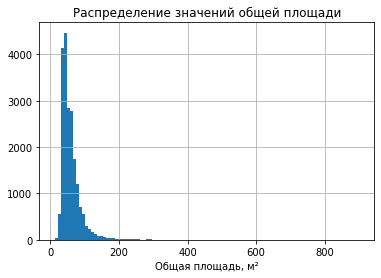

In [36]:
# построение гистограммы
min_value_total_area = data['total_area'].min()
max_value_total_area = data['total_area'].max()
data['total_area'].hist(bins=100, range=(min_value_total_area, max_value_total_area))
plt.title('Распределение значений общей площади')
plt.xlabel('Общая площадь, м²')
plt.show()

Из гистограммы видно, что значений вблизи нуля мало, также как и значений свыше ста. Так что минимальное и максимальное значение являются выбросами, можно избавиться от них.

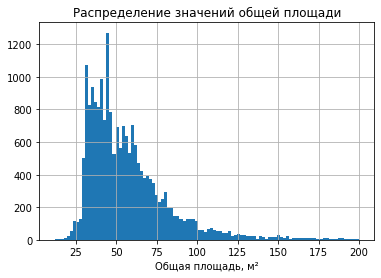

In [37]:
# построение гистограммы
data['total_area'].hist(bins=100, range=(min_value_total_area, 200))
plt.title('Распределение значений общей площади')
plt.xlabel('Общая площадь, м²')
plt.show()

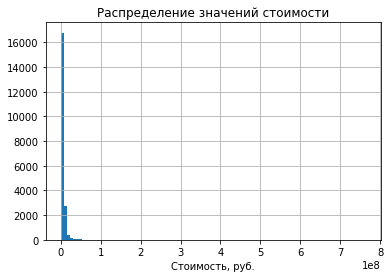

In [38]:
# построение гистограммы
min_value_last_price = data['last_price'].min()
max_value_last_price = data['last_price'].max()
data['last_price'].hist(bins=100, range=(min_value_last_price, max_value_last_price))
plt.title('Распределение значений стоимости')
plt.xlabel('Стоимость, руб.')
plt.show()

Невооруженным глазом видно, что максимальное значение является выбросом, а вот на счет минимального необходимо посмотреть точнее, изменив масштаб.

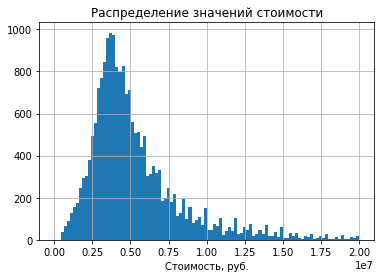

In [39]:
# построение гистограммы
data['last_price'].hist(bins=100, range=(min_value_last_price, 20000000))
plt.title('Распределение значений стоимости')
plt.xlabel('Стоимость, руб.')
plt.show()

Вблизи нуля значений нет, значит и минимальное значение также можно исключить.

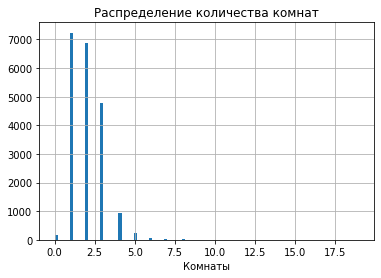

In [40]:
# построение гистограммы
min_value_rooms = data['rooms'].min()
max_value_rooms = data['rooms'].max()
data['rooms'].hist(bins=100, range=(min_value_rooms, max_value_rooms))
plt.title('Распределение количества комнат')
plt.xlabel('Комнаты')
plt.show()

Минимальное значение равное нулю можно исключить сразу. Максимальное - 19 комнат, также аномальное в нашем случае.

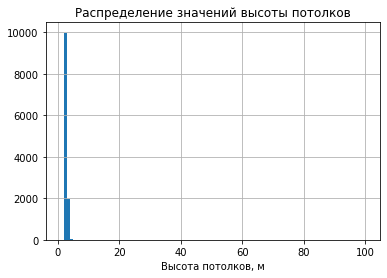

In [41]:
# построение гистограммы
min_value_ceiling_height = data['ceiling_height'].min()
max_value_ceiling_height = data['ceiling_height'].max()
data['ceiling_height'].hist(bins=100, range=(min_value_ceiling_height, max_value_ceiling_height))
plt.title('Распределение значений высоты потолков')
plt.xlabel('Высота потолков, м')
plt.show()

И тут из гистограммы видно, что максимальное и минимальное значение - выбросы.

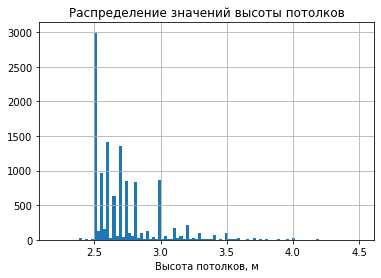

In [42]:
# построение гистограммы
data['ceiling_height'].hist(bins=100, range=(2.2, 4.5))
plt.title('Распределение значений высоты потолков')
plt.xlabel('Высота потолков, м')
plt.show()

Можно сделать вывод, что в данных присутствуют выбросы, от которых следует избавиться. Основнное количество значений параметров сосредоточено в промежутке между первым и третьим квартилями плюс/минус какой-то коэффициент межквартильного размаха.

### Изучение времени продажи квартиры, расчёт среднего и медианы

Время продажи квартиры характеризуется столбцом `days_exposition`. Построим распределение по времени до снятия объявления.

In [43]:
# получение описательной статистики данных датасета
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Так как третий квартиль имеет значение 231, ограничимся значением 300.

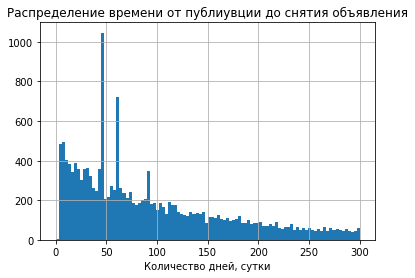

In [44]:
# построение гистограммы
data['days_exposition'].hist(bins=100, range=(0, 300))
plt.title('Распределение времени от публиувции до снятия объявления')
plt.xlabel('Количество дней, сутки')
plt.show()

Рассмотрим пики на гистограмме внимательнее.

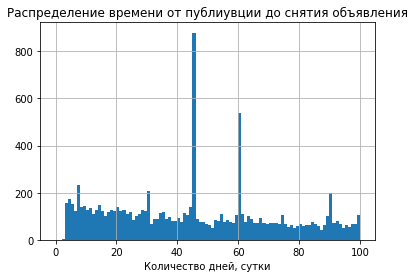

In [45]:
# построение гистограммы
data['days_exposition'].hist(bins=100, range=(0, 100))
plt.title('Распределение времени от публиувции до снятия объявления')
plt.xlabel('Количество дней, сутки')
plt.show()

In [46]:
# получение уникальных значений и их количества
data['days_exposition'].value_counts()

45      879
60      538
7       234
30      208
90      200
       ... 
1430      1
775       1
807       1
871       1
1175      1
Name: days_exposition, Length: 1139, dtype: int64

(1, 1000)

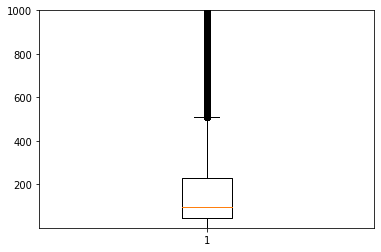

In [47]:
# построение диаграммы размаха
plt.boxplot(data['days_exposition'])
plt.ylim(1,1000)

Были обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 сутках - это наиболее популярное количество суток до снятия объявления. Согласно правилам размещения в Яндекс.Недвижимость, именно после этих сроков объявление считается неактуальным и снимается автоматически. https://yandex.ru/support/realty/owner/home/add-ads-housing.html.

Среднее значение - 181 суток, а медиана - 95 суток. 

Исходя из метода describe, межквартильный размах - от 45 до 231 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 500 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Значит нормальные значения у нас лежат от 1 до 500.

### Исключение квартир с редкими и выбивающиемися значениями

Исключим выбросы в данных по размещению объявлений.

In [48]:
# фильтрация по выбросам 
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')


(1, 1000)

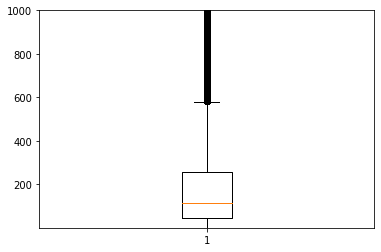

In [49]:
# построение диаграммы размаха
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

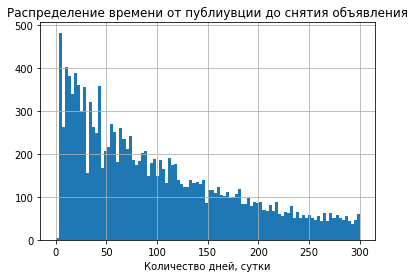

In [50]:
# построение гистограммы
good_data['days_exposition'].hist(bins=100, range=(0, 300))
plt.title('Распределение времени от публиувции до снятия объявления')
plt.xlabel('Количество дней, сутки')
plt.show()

In [51]:
# получение описательной статистики данных датасета
good_data['days_exposition'].describe()

count    18335.000000
mean       195.709136
std        226.796685
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

В очищенных от аномалий данных получаем значения медианы и среднего - 114 и 196 соответственно, вместо 95 и 181, а нормальные значения располагаются от 1 до 600 дней вместо от 1 до 500 дней.

In [52]:
# получение описательной статистики данных датасета
data[['total_area', 'last_price', 'rooms', 'ceiling_height','price_per_meter', 'total_living_area_ratio', 'total_kitchen_area_ratio']].describe()

,total_area,last_price,rooms,ceiling_height,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
count,20394.000000,2.039400e+04,20394.000000,12031.000000,2.039400e+04,18724.000000,18371.000000
mean,58.834265,6.263722e+06,2.024370,2.761540,9.801293e+04,0.562871,0.189232
std,34.066200,1.088858e+07,1.055162,1.264764,4.781169e+04,0.105285,0.072625
min,12.000000,1.219000e+04,0.000000,1.000000,1.118349e+02,0.021583,0.025381
25%,39.500000,3.400000e+06,1.000000,2.520000,7.647059e+04,0.492071,0.135185
50%,50.800000,4.500000e+06,2.000000,2.650000,9.407651e+04,0.565482,0.175000
75%,67.800000,6.500000e+06,3.000000,2.800000,1.121212e+05,0.636066,0.234375
max,900.000000,7.630000e+08,19.000000,100.000000,1.907500e+06,1.000000,0.787879


Общую площадь возьмем в диапазоне (26; q3 + 1,5 * (q3 - q1)). Получим диапазон от 26 до 110,2. Цифра 26 взята из разумно минимального значения площади жилья.

In [53]:
# фильтрация по выбросам 
good_data = good_data.query('total_area <= 110.2 and total_area >= 26')

Цену отфильтруем в диапазоне (1e+06, q3 + 1,5 * (q3 - q1)). Получим диапазон от 1 до 11,2 млн. руб. Цифра 1 млн. руб. взята из разумно минимального значения цены.

In [54]:
# фильтрация по выбросам 
good_data = good_data.query('last_price <= 11.2e+06 and last_price >= 1e+06')

Количество комнат возьмем в диапазоне (1; q3 + 1,5 * (q3 - q1)). Получим диапазон от 1 до 6.

In [55]:
# фильтрация по выбросам 
good_data = good_data.query('rooms <= 6 and rooms >= 1')

Высоту потолков возьмем в диапазоне (q1 - 1,5 * (q3 - q1); q3 + 1,5 * (q3 - q1)). Получим диапазон от 2,1 до 3,2.

In [56]:
# фильтрация по выбросам 
good_data = good_data.query('ceiling_height <= 3.2 and ceiling_height >= 2.1')

In [57]:
# получение описательной статистики данных датасета
good_data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'price_per_meter', 'total_living_area_ratio', 'total_kitchen_area_ratio']].describe()

,total_area,last_price,rooms,ceiling_height,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
count,9363.000000,9.363000e+03,9363.000000,9363.000000,9363.000000,9009.000000,8972.000000
mean,52.348534,4.800248e+06,1.923849,2.657246,92779.984695,0.565071,0.187745
std,16.709522,1.972598e+06,0.861524,0.167291,27026.400045,0.099587,0.068710
min,26.000000,1.000000e+06,1.000000,2.300000,13483.146067,0.038462,0.059933
25%,39.250000,3.450000e+06,1.000000,2.500000,76433.121019,0.500000,0.136364
50%,49.000000,4.450000e+06,2.000000,2.600000,93023.255814,0.568571,0.175159
75%,62.470000,5.816300e+06,3.000000,2.750000,108823.529412,0.634921,0.230769
max,110.000000,1.120000e+07,6.000000,3.200000,248484.848485,0.973262,0.715232


Из статистики видно, что датасет не содержит явных аномалий.

### Изучение зависимости цены от площади, числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года

Проверим зависимость цены от общей площади, числа комнат, этажа и удаленности от центра.

In [58]:
# построение сводной таблицы
price_total_area = good_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])

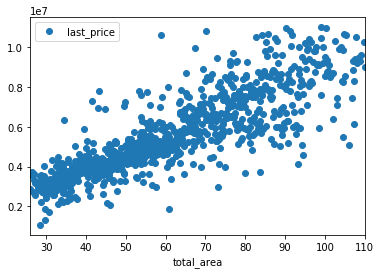

In [59]:
# построение диаграммы рассеяния
price_total_area.plot(y = 'median', style = 'o')

Зависимость цены от общей площади изначально носит практически линейный характер, а начиная примерно с 65 квадратных метров разброс становится более заметным.

In [60]:
# построение сводной таблицы
price_rooms = good_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])

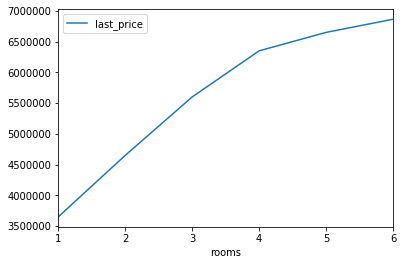

In [61]:
# построение графика
price_rooms.plot(y = 'median')

Цена от количества комнат растет, но начиная с 3 комнат - рост заметно замедляется.

In [62]:
# построение сводной таблицы
price_floor_status = good_data.query('floor_status != "другой"').pivot_table(index = 'floor_status', values = 'last_price', aggfunc = ['median'])

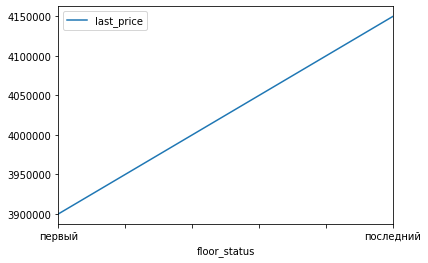

In [63]:
# построение графика
price_floor_status.plot(y = 'median')

Явно видно, что первый этаж обходится дешевле.

In [64]:
# построение сводной таблицы
price_city_centers_nearest = good_data.pivot_table(index = 'city_centers_nearest', values = 'last_price', aggfunc = ['median'])

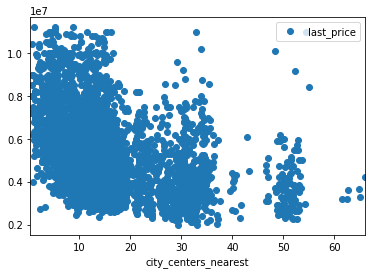

In [65]:
# построение диаграммы рассеяния
price_city_centers_nearest.plot(y = 'median', style = 'o')

Заметно, что чем ближе к центру расположен объект недвижимости, тем выше его стоимость.

In [66]:
# вычисление коэффициентов корреляции Пирсона
corr = good_data[['last_price',\
           'total_area',\
           'rooms',\
           'city_centers_nearest']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,city_centers_nearest
last_price,1,0.687855,0.424122,-0.326874
total_area,0.687855,1,0.80319,-0.101465
rooms,0.424122,0.80319,1,-0.053166
city_centers_nearest,-0.326874,-0.101465,-0.053166,1


Коэффициент корреляции Пирсона для площади равен 0,7. Это говорит о том, что зависимость сильная. Зависимость от количества комнат - 0,4. Это подтверждает график, на котором видно, что начиная с 3 комнат зависимость ослабевает. Коэффициент Пирсона для удаленности от центра имеет отризательное значение. Это демонтстрирует, что с увеличением расстояния цена падает.

Проверим зависимость цены от даты размещения: дня недели, месяца и года.

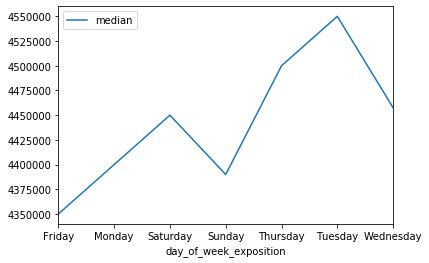

In [67]:
# построение сводной таблицы
price_day_of_week_exposition = good_data.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = ['median', 'count'])
price_day_of_week_exposition.columns = ['median', 'count']

# построение графика
price_day_of_week_exposition.plot(y = 'median')

In [68]:
# сортировка
price_day_of_week_exposition.sort_values('median', ascending = False)

,median,count
day_of_week_exposition,,
Tuesday,4550000,1676
Thursday,4500000,1722
Wednesday,4457500,1526
Saturday,4450000,764
Monday,4400000,1489
Sunday,4390000,635
Friday,4350000,1551


Чаще всего размещают объявления по будним дням, а реже всего по выходным. При этом цены на объекты, которые размещают по вторникам и четвергам самые высокие, а по субботам и пятницам - самые низкие. С чем это связано, у меня идей нет. 

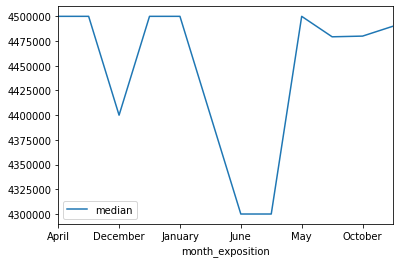

In [69]:
# построение сводной таблицы
price_month_exposition = good_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['median', 'count'])
price_month_exposition.columns = ['median', 'count']

# построение графика
price_month_exposition.plot(y = 'median')

In [70]:
# сортировка
price_month_exposition.sort_values('median', ascending = False)

,median,count
month_exposition,,
April,4500000,663
August,4500000,775
February,4500000,1105
January,4500000,576
May,4500000,476
September,4490000,831
October,4480000,957
November,4479300,985
December,4400000,618


Самая высокая стоимость в апреле, августе, феврале, январе и мае. Самая низкая стоимость в марте и июне. С чем это связано, я также не знаю.

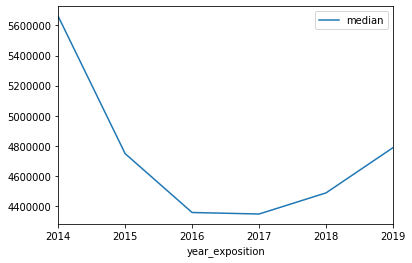

In [71]:
# построение сводной таблицы
price_year_exposition = good_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['median', 'count'])
price_year_exposition.columns = ['median', 'count']

# построение графика
price_year_exposition.plot(y = 'median')

In [72]:
# сортировка
price_year_exposition.sort_values('year_exposition')

,median,count
year_exposition,,
2014,5660000,40
2015,4750000,425
2016,4360000,1038
2017,4350000,3319
2018,4490000,3917
2019,4789750,624


Стоимость с 2014 до 2016 года падала, но далее начала увеличиваться. С чем это связано мне не известно.

На стоимость квартиры сильнее всего влияет количество комнат и расположение на последнем этаже. Ну и отрицательная корреляция между стоимостью за квадрат и центром тоже имеет место быть.

### Выбор 10 населённых пунктов с наибольшим числом объявлений, расчет средней цены квадратного метра в этих населённых пунктах и обнаружение среди них населённых пунктов с самой высокой и низкой стоимостью жилья

In [73]:
# построение сводной таблицы
locality_table = good_data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
locality_table.columns = ['count', 'mean']

# сортировка
locality_table_10 = locality_table.sort_values('count', ascending = False).head(10)
locality_table_10

,count,mean
locality_name,,
Санкт-Петербург,6310,103974.583774
Всеволожск,196,66346.839237
посёлок Мурино,176,86380.827015
посёлок Шушары,169,77829.043257
Пушкин,156,98601.035551
Колпино,150,74834.136134
Петергоф,113,82869.518148
Гатчина,106,68090.426057
деревня Кудрово,105,90078.115607


In [74]:
# расчет самой высокой стоимости
locality_table_10[locality_table_10['mean'] == locality_table_10['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,6310,103974.583774


In [75]:
# расчет самой низкой стоимости
locality_table_10[locality_table_10['mean'] == locality_table_10['mean'].min()]

,count,mean
locality_name,,
Всеволожск,196,66346.839237


Из 10 населенных пунктов с самым большим количеством объявлений, самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая во Всеволожске, хотя там и много объявлений.

### Изучение предложений квартир (расстояние до центра) и определение квартир в Санкт-Петербурге. Определение области входящей в центр

Cтолбец с расстоянием до центра в километрах округлим до целых значений.

In [76]:
# заполнение пропущенных значений
good_data['city_centers_nearest'] = good_data['city_centers_nearest'].fillna(99999) 

# замена типа данных
good_data['city_centers_nearest'] = good_data['city_centers_nearest'].astype('int')

Расчет средней цены для каждого километра и построение графика зависимости цены от удаленности от центра и определение границы, где график сильно меняется (центральная зона).

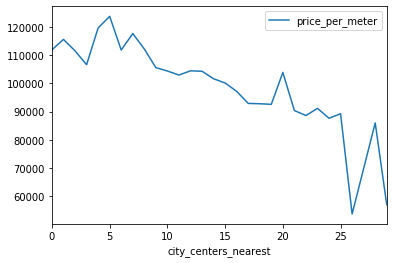

In [77]:
# построение сводной таблицы
city_centers_nearest_table = good_data.query('locality_name == "Санкт-Петербург" and city_centers_nearest !=99999').pivot_table(index = 'city_centers_nearest', values = 'price_per_meter', aggfunc = 'mean')

# построение графика
city_centers_nearest_table.plot()

Центром будем считать удаленность вплоть до 25 км.

### Выделение сегмента квартир в центре и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

Выделение сегмента квартир в центре.

In [78]:
# выделение квартир в центре
center_spb_data = good_data.query('city_centers_nearest <= 25 and locality_name == "Санкт-Петербург"')

Проверим зависимость цены от общей площади, числа комнат, высоты потолков, этажа, удаленности от центра и даты размещения объявления.

In [79]:
# построение сводной таблицы
price_spb_total_area = center_spb_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])

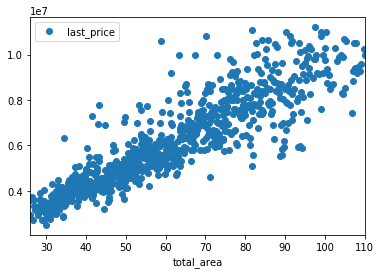

In [80]:
# построение диаграммы рассеяния
price_spb_total_area.plot(y = 'median', style = 'o')

Зависимость цены от общей площади в центре Санкт-Петербурга также изначально носит практически линейный характер, а начиная примерно с 65 квадратных метров разброс становится более заметным. Относительно общих данных цены смещены в сторону больших значений.

In [81]:
# построение сводной таблицы
price_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])

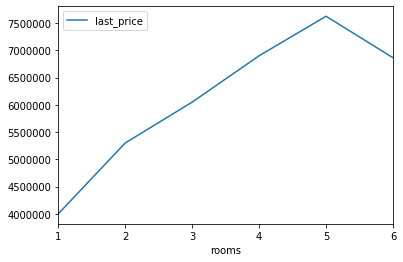

In [82]:
# построение графика
price_spb_rooms.plot(y = 'median')

В отличие от общих данных, цена от количества комнат в центре Санкт-Петербурга растет вплоть до 5 комнат, а затем падает.

In [83]:
# построение сводной таблицы
price_spb_ceiling_height = center_spb_data.pivot_table(index = 'ceiling_height', values = 'last_price', aggfunc = ['median'])

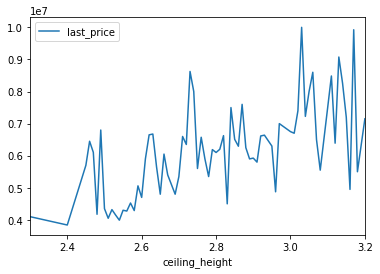

In [84]:
# построение графика
price_spb_ceiling_height.plot(y = 'median')

В среднем, цена от высоты потолков растет.

In [85]:
# построение сводной таблицы
price_spb_floor_status = center_spb_data.query('floor_status != "другой"').pivot_table(index = 'floor_status', values = 'last_price', aggfunc = ['median'])

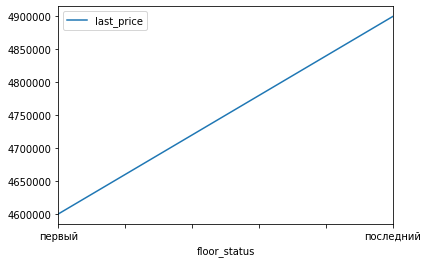

In [86]:
# построение графика
price_spb_floor_status.plot(y = 'median')

Явно видно, что первый этаж обходится дешевле, так же как и в общих данных, но первый этаж в центре Санкт-Петербурга дороже.

In [87]:
# построение сводной таблицы
price_spb_city_centers_nearest = center_spb_data.pivot_table(index = 'city_centers_nearest', values = 'last_price', aggfunc = ['median'])

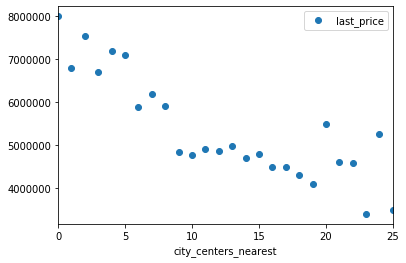

In [88]:
# построение графика
price_spb_city_centers_nearest.plot(y = 'median', style = 'o')

В радиусе 8 км цена плавно снижается, а с 9 до 19 примерно стабильна.

In [89]:
# вычисление коэффициентов корреляции Пирсона
corr = center_spb_data[['last_price',\
           'total_area',\
           'rooms',\
           'city_centers_nearest']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,city_centers_nearest
last_price,1,0.785748,0.484794,-0.310469
total_area,0.785748,1,0.793974,-0.156348
rooms,0.484794,0.793974,1,-0.114035
city_centers_nearest,-0.310469,-0.156348,-0.114035,1


Коэффициенты Пирсона похожи, но чуть выше.

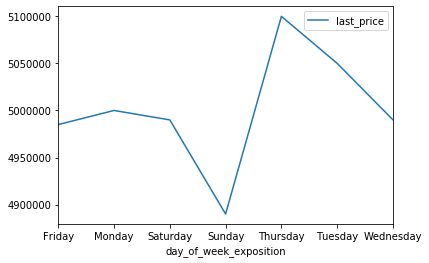

In [90]:
# построение сводной таблицы
price_spb_day_of_week_exposition = center_spb_data.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = ['median'])

# построение графика
price_spb_day_of_week_exposition.plot(y = 'median')

Цены на объекты в центре Санкт-Петербурга, которые размещают по четвергам самые высокие, а по субботам - самые низкие. В целом это совпадает с результатами общих данных.

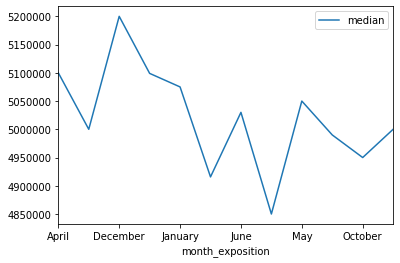

In [91]:
# построение сводной таблицы
price_spb_month_exposition = center_spb_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['median'])
price_spb_month_exposition.columns = ['median']

# построение графика
price_spb_month_exposition.plot(y = 'median')

In [92]:
# сортировка
price_spb_month_exposition.sort_values('median', ascending = False)

,median
month_exposition,
December,5200000
April,5100000
February,5099000
January,5075000
May,5050000
June,5030000
August,5000000
September,5000000
November,4990000


Самая высокая стоимость в декабре и апреле. Самая низкая стоимость в марте и июне. Это похоже на результаты общих данных, только в данном случае декабрь выбился в лидеры.

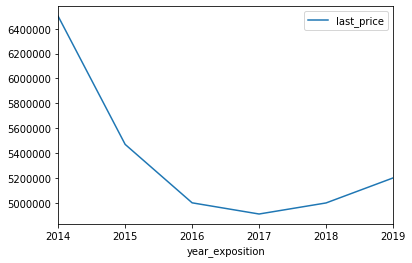

In [93]:
# построение сводной таблицы
price_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['median'])

# построение графика
price_spb_year_exposition.plot(y = 'median')

Стоимость с 2014 до 2017 года падала, но далее начала увеличиваться. Это практически полностью повторяет результаты общих данных.

### Выводы

В исследовательском анализе данных были обнаружены и удалены выбросы и аномальные данные. 


Можно сделать вывод, что продажи прошли необычно долго, если объявление не снималось более 600 дней.


На стоимость квартиры сильнее всего влияет количество комнат и расположение на последнем этаже. Ну и отрицательная корреляция между стоимостью за квадрат и центром тоже имеет место быть.


Из 10 населенных пунктов с самым большим количеством объявлений, самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая во Всеволожске, хотя там и много объявлений.


Центром будем считать удаленность вплоть до 25 км.


В целом, данные по центру города не сильно отличаются от данных вообще.

## Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.

Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней.

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 25 километров.